**import libraries needed**

In [1]:
!pip install nltk==3.4

     |████████████████████████████████| 1.4MB 8.6MB/s 
  Created wheel for nltk: filename=nltk-3.4-cp37-none-any.whl size=1436385 sha256=8647b1d79b418c7760fd6b93dcef349484150c53b8a818ecb4c03acfc594585f
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:

import nltk, re, pprint, string
import pandas as pd
import seaborn as sns
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams
from matplotlib import pyplot as plt
from __future__ import generator_stop
from nltk.corpus import stopwords
string.punctuation = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—'
string.punctuation = string.punctuation.replace('.', '')
from google.colab import files

**Download these nltk packages**

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Upload the files  **

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Alchemist.txt to Alchemist.txt
Saving ElevenMinutes.txt to ElevenMinutes.txt
User uploaded file "Alchemist.txt" with length 212158 bytes
User uploaded file "ElevenMinutes.txt" with length 403420 bytes


**Read the files**

In [5]:
#read file1
sample = open("Alchemist.txt", "r") 
data1 = sample.read()
#read file2
sample = open("ElevenMinutes.txt", "r") 
data2 = sample.read()


**Data cleaning**

In [6]:
#preprocess data
def Preprocess_data(data):
  file_nl_removed = ""
  for line in data:
    line_nl_removed = line.replace("\n", " ")      #removes newlines
    file_nl_removed += line_nl_removed
  data_clean = "".join([char for char in file_nl_removed if char not in string.punctuation])   #removes all special characters
  return data_clean
data1_clean=Preprocess_data(data1)
data2_clean=Preprocess_data(data2)

**Get Statistics of the two corpus**

In [7]:
def Show_Stat(data):
  #Segments the text and prints the number of sentences
  sents = nltk.sent_tokenize(data)               
  print("The number of sentences is", len(sents))    

  #tokenize the text and prints the number of tokens
  words = nltk.word_tokenize(data)
  print("The number of tokens is", len(words))

  #prints the average number of tokens per sentence
  average_tokens = round(len(words)/len(sents))
  print("The average number of tokens per sentence is",
  average_tokens) 

  #prints the number of words types
  word_types = set(words)
  print("The number of unique tokens are", len(word_types)) 

print("\t\tStatistics Of corpora1\n") 
Show_Stat(data1_clean)
print("\n\t\tStatistics Of corpora2\n") 
Show_Stat(data2_clean)

		Statistics Of corpora1

The number of sentences is 2614
The number of tokens is 41407
The average number of tokens per sentence is 16
The number of unique tokens are 3630

		Statistics Of corpora2

The number of sentences is 3097
The number of tokens is 74188
The average number of tokens per sentence is 24
The number of unique tokens are 6370


In [8]:
stop_words = set(stopwords.words('english'))
def getNgrams(data):
  unigram=[]
  bigram=[]
  trigram=[]
  tokenized_text = []
  sents = nltk.sent_tokenize(data) 
  for sentence in sents:
      sentence = sentence.lower()
      sequence = word_tokenize(sentence) 
      for word in sequence:
          if (word =='.'):
              sequence.remove(word) 
          else:
              unigram.append(word)
      tokenized_text.append(sequence) 
      bigram.extend(list(ngrams(sequence, 2)))  
      trigram.extend(list(ngrams(sequence, 3)))
  return unigram,bigram,trigram

In [9]:

unigram1,bigram1,trigram1=getNgrams(data1_clean)
unigram2,bigram2,trigram2=getNgrams(data2_clean)

def removeOnlyStopwords(x):     
#removes ngrams containing only stopwords
    y = []
    for pair in x:
        count = 0
        for word in pair:
            if word in stop_words:
                count = count or 0
            else:
                count = count or 1
        if (count==1):
            y.append(pair)
    return(y)
unigram1=removeOnlyStopwords(unigram1)
bigram1 = removeOnlyStopwords(bigram1)
trigram1 = removeOnlyStopwords(trigram1)   

unigram2=removeOnlyStopwords(unigram2)
bigram2 = removeOnlyStopwords(bigram2)
trigram2 = removeOnlyStopwords(trigram2) 




freq_uni1=nltk.FreqDist(unigram1)
freq_bi1 = nltk.FreqDist(bigram1)
freq_tri1 = nltk.FreqDist(trigram1)


print("\n\nMost common n-grams of corpus 1 without stopword removal and without add-1 smoothing: \n")
print ("Most common unigrams: ", freq_uni1.most_common(10))
print ("Most common bigrams: ", freq_bi1.most_common(10))
print ("Most common trigrams: ", freq_tri1.most_common(10))















Most common n-grams of corpus 1 without stopword removal and without add-1 smoothing: 

Most common unigrams:  [('the', 3516), ('and', 1085), ('he', 1071), ('of', 933), ('that', 746), ('was', 600), ('had', 585), ('in', 510), ('boy', 498), ('his', 488)]
Most common bigrams:  [(('the', 'boy'), 491), (('the', 'desert'), 169), (('the', 'alchemist'), 134), (('the', 'old'), 109), (('the', 'world'), 101), (('said', 'the'), 81), (('old', 'man'), 73), (('the', 'wind'), 71), (('he', 'said'), 63), (('the', 'englishman'), 63)]
Most common trigrams:  [(('the', 'old', 'man'), 69), (('of', 'the', 'world'), 59), (('of', 'the', 'desert'), 46), (('the', 'boy', 'said'), 45), (('the', 'boy', 'was'), 39), (('the', 'soul', 'of'), 38), (('soul', 'of', 'the'), 38), (('in', 'the', 'desert'), 27), (('and', 'the', 'boy'), 25), (('the', 'boy', 'thought'), 25)]


In [10]:
freq_uni2=nltk.FreqDist(unigram2)
freq_bi2 = nltk.FreqDist(bigram2)
freq_tri2 = nltk.FreqDist(trigram2)

print("\n\nMost common n-grams of corpus 2 without stopword removal and without add-1 smoothing: \n")
print ("Most common unigrams: ", freq_uni2.most_common(5))
print ("Most common bigrams: ", freq_bi2.most_common(5))
print ("Most common trigrams: ", freq_tri2.most_common(5))



Most common n-grams of corpus 2 without stopword removal and without add-1 smoothing: 

Most common unigrams:  [('the', 3485), ('and', 2041), ('she', 1972), ('of', 1463), ('her', 1354)]
Most common bigrams:  [(('she', 'would'), 111), (('she', 'could'), 95), (('the', 'man'), 87), (('the', 'world'), 85), (('to', 'go'), 67)]
Most common trigrams:  [(('in', 'order', 'to'), 49), (('in', 'the', 'world'), 36), (('the', 'first', 'time'), 30), (('a', 'time', 'to'), 30), (('would', 'like', 'to'), 27)]


**Frequency Distribution Of Unigrams of both Corpus without StopWord Removal**

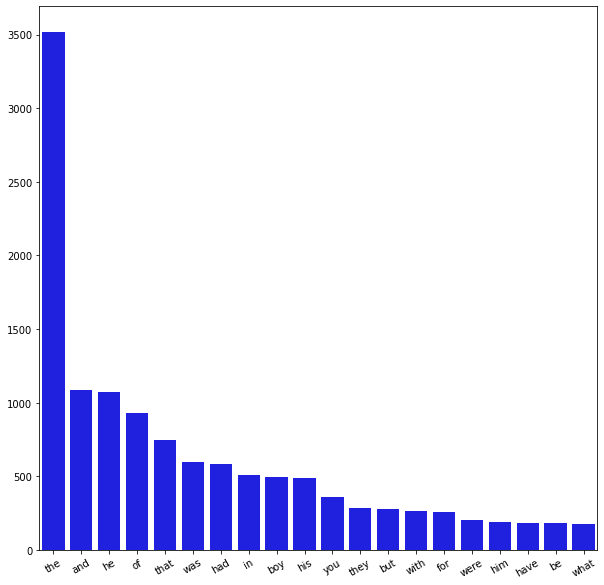

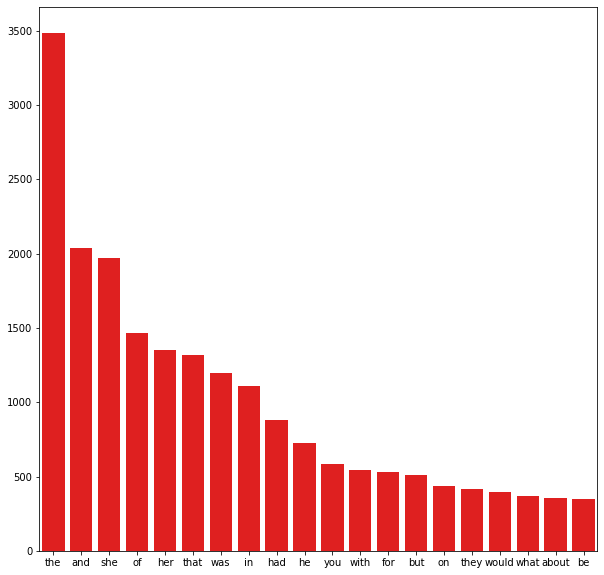

In [11]:

## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist1 = freq_uni1.most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist1 = pd.Series(dict(all_fdist1))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing



all_plot = sns.barplot(x=all_fdist1.index, y=all_fdist1.values, color="blue",ax=ax)

plt.xticks(rotation=30);

all_fdist2=freq_uni2.most_common(20)

all_fdist2 = pd.Series(dict(all_fdist2))

fig, ax = plt.subplots(figsize=(10,10))

all_plot = sns.barplot(x=all_fdist2.index, y=all_fdist2.values,color="red", ax=ax)


**Frequency Distribution Of Bigrams of both Corpus without StopWord Removal**

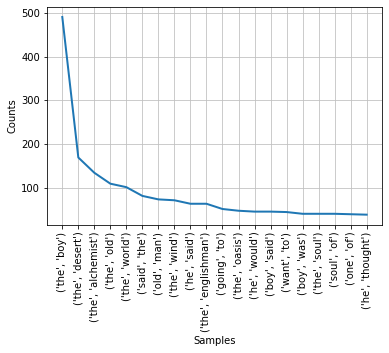

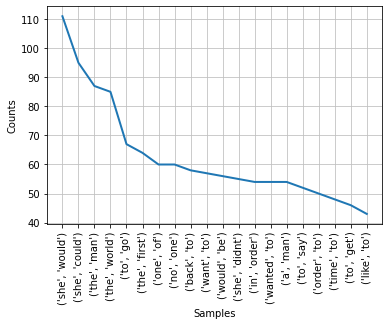

In [12]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
freq_bi1.plot(20)
freq_bi2.plot(20)


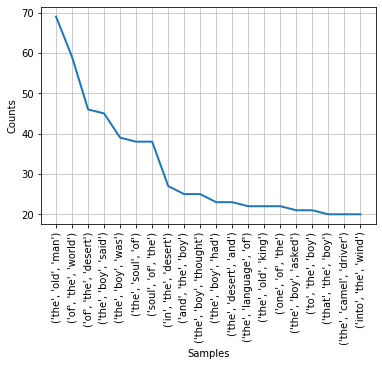

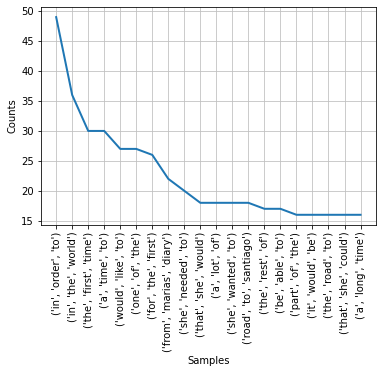

In [13]:
freq_tri1.plot(20)
freq_tri2.plot(20)

In [14]:

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#prints top 10 unigrams, bigrams after removing stopwords
print("Most common n-grams for corpus1 with stopword removal and without add-1 smoothing: \n")
unigram_sw_removed = [p for p in unigram1 if p not in stop_words]
fdist = nltk.FreqDist(unigram_sw_removed)
print("Most common unigrams: ", fdist.most_common(10))
bigram_sw_removed = []
bigram_sw_removed.extend(list(ngrams(unigram_sw_removed, 2)))
fdist = nltk.FreqDist(bigram_sw_removed)
print("\nMost common bigrams: ", fdist.most_common(10))

trigram_sw_removed = []
trigram_sw_removed.extend(list(ngrams(unigram_sw_removed, 3)))
fdist = nltk.FreqDist(trigram_sw_removed)
print("\nMost common trigrams: ", fdist.most_common(10))

Most common n-grams for corpus1 with stopword removal and without add-1 smoothing: 

Most common unigrams:  [('boy', 498), ('desert', 177), ('one', 168), ('man', 161), ('would', 152), ('alchemist', 148), ('old', 129), ('know', 112), ('world', 110), ('could', 109)]

Most common bigrams:  [(('old', 'man'), 73), (('soul', 'world'), 35), (('boy', 'thought'), 27), (('old', 'king'), 24), (('camel', 'driver'), 22), (('dont', 'know'), 21), (('boy', 'asked'), 21), (('could', 'see'), 15), (('urim', 'thummim'), 15), (('crystal', 'merchant'), 15)]

Most common trigrams:  [(('boy', 'could', 'see'), 6), (('find', 'hidden', 'treasure'), 4), (('want', 'something', 'universe'), 4), (('something', 'universe', 'conspires'), 4), (('philosophers', 'stone', 'elixir'), 4), (('stone', 'elixir', 'life'), 4), (('boy', 'asked', 'alchemist'), 4), (('sacred', 'heart', 'jesus'), 3), (('give', 'onetenth', 'treasure'), 3), (('dont', 'know', 'turn'), 3)]


In [15]:
print("Most common n-grams for corpus2 with stopword removal and without add-1 smoothing: \n")
unigram_sw_removed = [p for p in unigram2 if p not in stop_words]
fdist = nltk.FreqDist(unigram_sw_removed)
print("Most common unigrams: ", fdist.most_common(10))
bigram_sw_removed = []
bigram_sw_removed.extend(list(ngrams(unigram_sw_removed, 2)))
fdist = nltk.FreqDist(bigram_sw_removed)
print("\nMost common bigrams: ", fdist.most_common(10))

trigram_sw_removed = []
trigram_sw_removed.extend(list(ngrams(unigram_sw_removed, 3)))
fdist = nltk.FreqDist(trigram_sw_removed)
print("\nMost common trigrams: ", fdist.most_common(10))

Most common n-grams for corpus2 with stopword removal and without add-1 smoothing: 

Most common unigrams:  [('would', 397), ('one', 298), ('maria', 265), ('time', 258), ('could', 228), ('man', 222), ('like', 208), ('didnt', 187), ('love', 186), ('know', 185)]

Most common bigrams:  [(('would', 'like'), 51), (('ralf', 'hart'), 40), (('first', 'time'), 30), (('eleven', 'minutes'), 25), (('didnt', 'know'), 24), (('even', 'though'), 24), (('marias', 'diary'), 23), (('go', 'back'), 23), (('dont', 'know'), 22), (('would', 'never'), 20)]

Most common trigrams:  [(('rue', 'de', 'berne'), 15), (('like', 'everyone', 'else'), 9), (('would', 'like', 'drink'), 8), (('three', 'hundred', 'fifty'), 7), (('fruit', 'juice', 'cocktail'), 7), (('rio', 'de', 'janeiro'), 6), (('one', 'thousand', 'francs'), 5), (('thousand', 'swiss', 'francs'), 5), (('could', 'earn', 'enough'), 5), (('hundred', 'fifty', 'francs'), 5)]


**Next Word Prediction**

In [16]:
str1 = 'the boy could see'
str2 = 'alchemist is good'

token_1 = word_tokenize(str1)
token_2 = word_tokenize(str2)
ngram_1 = {1:[], 2:[], 3:[]}   #to store the n-grams formed  
ngram_2 = {1:[], 2:[], 3:[]}
for i in range(3):
    ngram_1[i+1] = list(ngrams(token_1, i+1))[-1]
    ngram_2[i+1] = list(ngrams(token_2, i+1))[-1]
print("String 1: ", ngram_1,"\nString 2: ",ngram_2)

String 1:  {1: ('see',), 2: ('could', 'see'), 3: ('boy', 'could', 'see')} 
String 2:  {1: ('good',), 2: ('is', 'good'), 3: ('alchemist', 'is', 'good')}
